In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline

from sklearn import tree
from sklearn import metrics,model_selection,preprocessing
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler

# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Modeling
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, recall_score
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Tuning
# from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('../datasets/mentalhealth.csv')
df.head()

Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  

[5 rows x 27 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [4]:
#Check for missing values
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [5]:
#Data Cleaning
# df.isna().sum()/len(df.index)*100

In [6]:
#Drop Columns
df.drop(columns=['Timestamp', 'Country', 'state', 'comments', 'no_employees'], inplace = True)

In [7]:
#Rename Columns
df.rename({'self_employed' : 'Self_Employed', 'family_history' : 'Family_History', 
           'treatment' : 'Treatment', 'work_interfere' : 'Work_Interfere', 'remote_work': 'Remote_Work', 'tech_company': 'Tech_Company', 
           'benefits': 'Benefits', 'care_options': 'Care_Options', 'wellness_program': 'Wellness_Program', 
           'seek_help': 'Seek_Help', 'anonymity': 'Anonymity', 'leave': 'Medical_Leave', 
           'mental_health_consequence': 'Mental_Health_Consequence', 
           'phys_health_consequence': 'Physical_Health_Consequence', 'coworkers': 'Coworkers', 
           'supervisor': 'Supervisor', 'mental_health_interview': 'Mental_Health_Interview', 
           'phys_health_interview': 'Physical_Health_Interview', 'mental_vs_physical': 'Mental_VS_Physical', 
           'obs_consequence': 'Observed_Consequence'} , inplace = True , axis = 1)

In [8]:
df['Age'].replace([df['Age'][df['Age'] < 15]], np.nan, inplace = True)
df['Age'].replace([df['Age'][df['Age'] > 100]], np.nan, inplace = True)

df['Age'].fillna(df['Age'].mean())
df['Age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., nan, 43., 56., 60., 54., 55., 48., 20., 57., 58., 47.,
       62., 51., 65., 49., 53., 61., 72.])

In [9]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',],0, inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 1, inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 2, inplace = True)

In [10]:
df['Gender'].value_counts()

0    991
1    247
2     21
Name: Gender, dtype: int64

In [11]:
#Check for missing values
df.isnull().sum()

Age                              8
Gender                           0
Self_Employed                   18
Family_History                   0
Treatment                        0
Work_Interfere                 264
Remote_Work                      0
Tech_Company                     0
Benefits                         0
Care_Options                     0
Wellness_Program                 0
Seek_Help                        0
Anonymity                        0
Medical_Leave                    0
Mental_Health_Consequence        0
Physical_Health_Consequence      0
Coworkers                        0
Supervisor                       0
Mental_Health_Interview          0
Physical_Health_Interview        0
Mental_VS_Physical               0
Observed_Consequence             0
dtype: int64

In [12]:
# Pre-processing
mode_onehot_pipe = Pipeline([
    ('encoder', SimpleImputer(strategy = 'most_frequent')),
    ('one hot encoder', OneHotEncoder(handle_unknown = 'ignore'))])

transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(handle_unknown = 'ignore'), ['Gender', 'Family_History', 'Employee_Numbers',
                                                           'Remote_Work', 'Tech_Company', 'Benefits', 'Care_Options',
                                                           'Wellness_Program', 'Seek_Help', 'Anonymity',
                                                           'Medical_Leave', 'Mental_Health_Consequence',
                                                           'Physical_Health_Consequence', 'Coworkers', 'Supervisor',
                                                           'Mental_Health_Interview', 'Physical_Health_Interview',
                                                           'Mental_VS_Physical', 'Observed_Consequence']),
    ('mode_onehot_pipe', mode_onehot_pipe, ['Self_Employed', 'Work_Interfere']),
    ('iterative', IterativeImputer(max_iter = 10, random_state = 0), ['Age'])])

In [13]:
df['Family_History'].replace(['No','Yes'],['0','1'],inplace=True)
df['Self_Employed'].replace(['No','Yes'],['0','1'],inplace=True)
df['Self_Employed']=df['Self_Employed'].fillna(0)

df['Treatment'].replace(['No','Yes'],[0,1],inplace=True)
df['Work_Interfere'].replace(['Never','Rarely','Sometimes','Often'],[0,1,2,3],inplace=True)
df['Work_Interfere']=df['Work_Interfere'].fillna(0)
df['Family_History'].replace(['No','Yes'],[0,1],inplace=True)

df['Remote_Work'].replace(['No','Yes'],[0,1],inplace=True)
df['Tech_Company'].replace(['No','Yes'],[0,1],inplace=True)
df['Benefits'].replace(['No','Yes'],[0,1],inplace=True)
df['Benefits'].replace(["Don't know"],[0],inplace=True)

In [14]:
df['Care_Options'].replace(['No','Not sure', 'Yes'],[0,0,1],inplace=True)
df['Wellness_Program'].replace(['No','Yes'],[0,1],inplace=True)
df['Wellness_Program'].replace(["Don't know"],[0],inplace=True)

df['Seek_Help'].replace(['No','Yes'],[0,1],inplace=True)
df['Seek_Help'].replace(["Don't know"],[0],inplace=True)
df['Anonymity'].replace(['No','Yes'],[0,1],inplace=True)
df['Anonymity'].replace(["Don't know"],[0],inplace=True)

df['Medical_Leave'].replace(["Very easy", "Somewhat easy", 
                             "Don't know","Somewhat difficult", "Very difficult"],[0,1,2,3,4],inplace=True)
df['Mental_Health_Consequence'].replace(['No','Yes','Maybe'],[0,1,2],inplace=True)
df['Physical_Health_Consequence'].replace(['No','Yes','Maybe'],[0,1,2],inplace=True)
df['Coworkers'].replace(['No','Yes',"Some of them"],[0,1,2],inplace=True)
df['Supervisor'].replace(['No','Yes',"Some of them"],[0,1,2],inplace=True)
df['Mental_Health_Interview'].replace(['No','Yes','Maybe'],[0,1,2],inplace=True)
df['Physical_Health_Interview'].replace(['No','Yes','Maybe'],[0,1,2],inplace=True)

df['Mental_VS_Physical'].replace(['No','Yes'],[0,1],inplace=True)
df['Mental_VS_Physical'].replace(["Don't know"],[0],inplace=True)
df['Observed_Consequence'].replace(['No','Yes'],[0,1],inplace=True)

In [15]:
df.head()

Age  Gender Self_Employed Family_History  Treatment  Work_Interfere  \
0  37.0       1             0              0          1             3.0   
1  44.0       0             0              0          0             1.0   
2  32.0       0             0              0          0             1.0   
3  31.0       0             0              1          1             3.0   
4  31.0       0             0              0          0             0.0   

   Remote_Work  Tech_Company  Benefits  Care_Options  ...  Anonymity  \
0            0             1         1             0  ...          1   
1            0             0         0             0  ...          0   
2            0             1         0             0  ...          0   
3            0             1         0             1  ...          0   
4            1             1         1             0  ...          0   

   Medical_Leave  Mental_Health_Consequence  Physical_Health_Consequence  \
0              1                          0                            0   
1              2                          2                            0   
2              3                          0                            0   
3              3                          1                            1   
4              2                          0                            0   

   Coworkers  Supervisor  Mental_Health_Interview  Physical_Health_Interview  \
0          2           1                        0                          2   
1          0           0                        0                          0   
2          1           1                        1                          1   
3          2           0                        2                          2   
4          2           1                        1                          1   

   Mental_VS_Physical  Observed_Consequence  
0                   1                     0  
1                   0                     0  
2                   0                     0  
3                   0                     1  
4                   0                     0  

[5 rows x 22 columns]

In [16]:
df = df[df['Age'].notna()]
# df.info()
df.isnull().sum()

Age                            0
Gender                         0
Self_Employed                  0
Family_History                 0
Treatment                      0
Work_Interfere                 0
Remote_Work                    0
Tech_Company                   0
Benefits                       0
Care_Options                   0
Wellness_Program               0
Seek_Help                      0
Anonymity                      0
Medical_Leave                  0
Mental_Health_Consequence      0
Physical_Health_Consequence    0
Coworkers                      0
Supervisor                     0
Mental_Health_Interview        0
Physical_Health_Interview      0
Mental_VS_Physical             0
Observed_Consequence           0
dtype: int64

In [17]:
# Target Data
# df['Treatment'].value_counts()/df.shape[0]*100

1    50.519584
0    49.480416
Name: Treatment, dtype: float64

In [200]:
# df['Treatment'] = np.where(df['Treatment'] == 'Yes', 1, 0)

In [19]:
# Drop Animal_name
# ML algorithms use math so we do not need string variables(animal names)
data = df.copy()

x = data.drop("Treatment",axis = 1)# input data
y = data.Treatment.values# target data

In [20]:
x.shape,y.shape

((1251, 21), (1251,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of y_train=>',y_train.shape)
print('Shape of y_test=>',y_test.shape)

Shape of X_train=> (750, 21)
Shape of X_test=> (501, 21)
Shape of y_train=> (750,)
Shape of y_test=> (501,)


## Decision Tree Classifier

In [22]:
decision_tree = tree.DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train,y_train)
y_pred_tree = decision_tree.predict(X_test)
print("Test Accurary : ",decision_tree.score(X_test,y_test))
print("Train Accurary : ",decision_tree.score(X_train,y_train))

Test Accurary :  0.720558882235529
Train Accurary :  1.0


In [23]:
y_pred_tree

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [24]:
cm_Dtree = confusion_matrix(y_test,y_pred_tree)
cr_Dtree = classification_report(y_test,y_pred_tree)
print("confusion matrix : \n",cm_Dtree)
print("classification report : \n",cr_Dtree)

confusion matrix : 
 [[173  58]
 [ 82 188]]
classification report : 
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       231
           1       0.76      0.70      0.73       270

    accuracy                           0.72       501
   macro avg       0.72      0.72      0.72       501
weighted avg       0.72      0.72      0.72       501



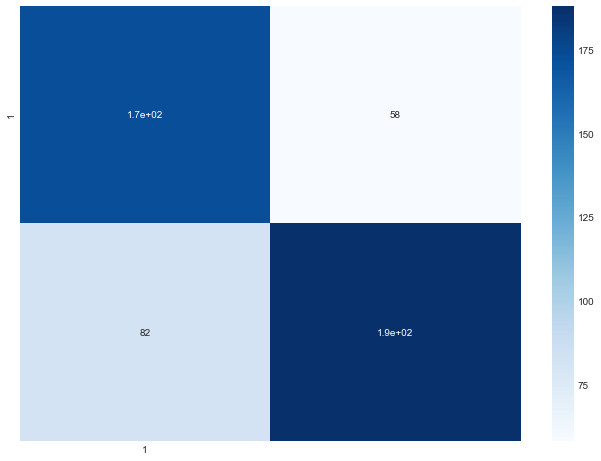

In [25]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_Dtree,annot = True,xticklabels = np.arange(1,2),yticklabels = np.arange(1,2),cmap = "Blues")
plt.show()

In [29]:
#Get column names

col_names = list(x.columns)
col_names

['Age',
 'Gender',
 'Self_Employed',
 'Family_History',
 'Work_Interfere',
 'Remote_Work',
 'Tech_Company',
 'Benefits',
 'Care_Options',
 'Wellness_Program',
 'Seek_Help',
 'Anonymity',
 'Medical_Leave',
 'Mental_Health_Consequence',
 'Physical_Health_Consequence',
 'Coworkers',
 'Supervisor',
 'Mental_Health_Interview',
 'Physical_Health_Interview',
 'Mental_VS_Physical',
 'Observed_Consequence']

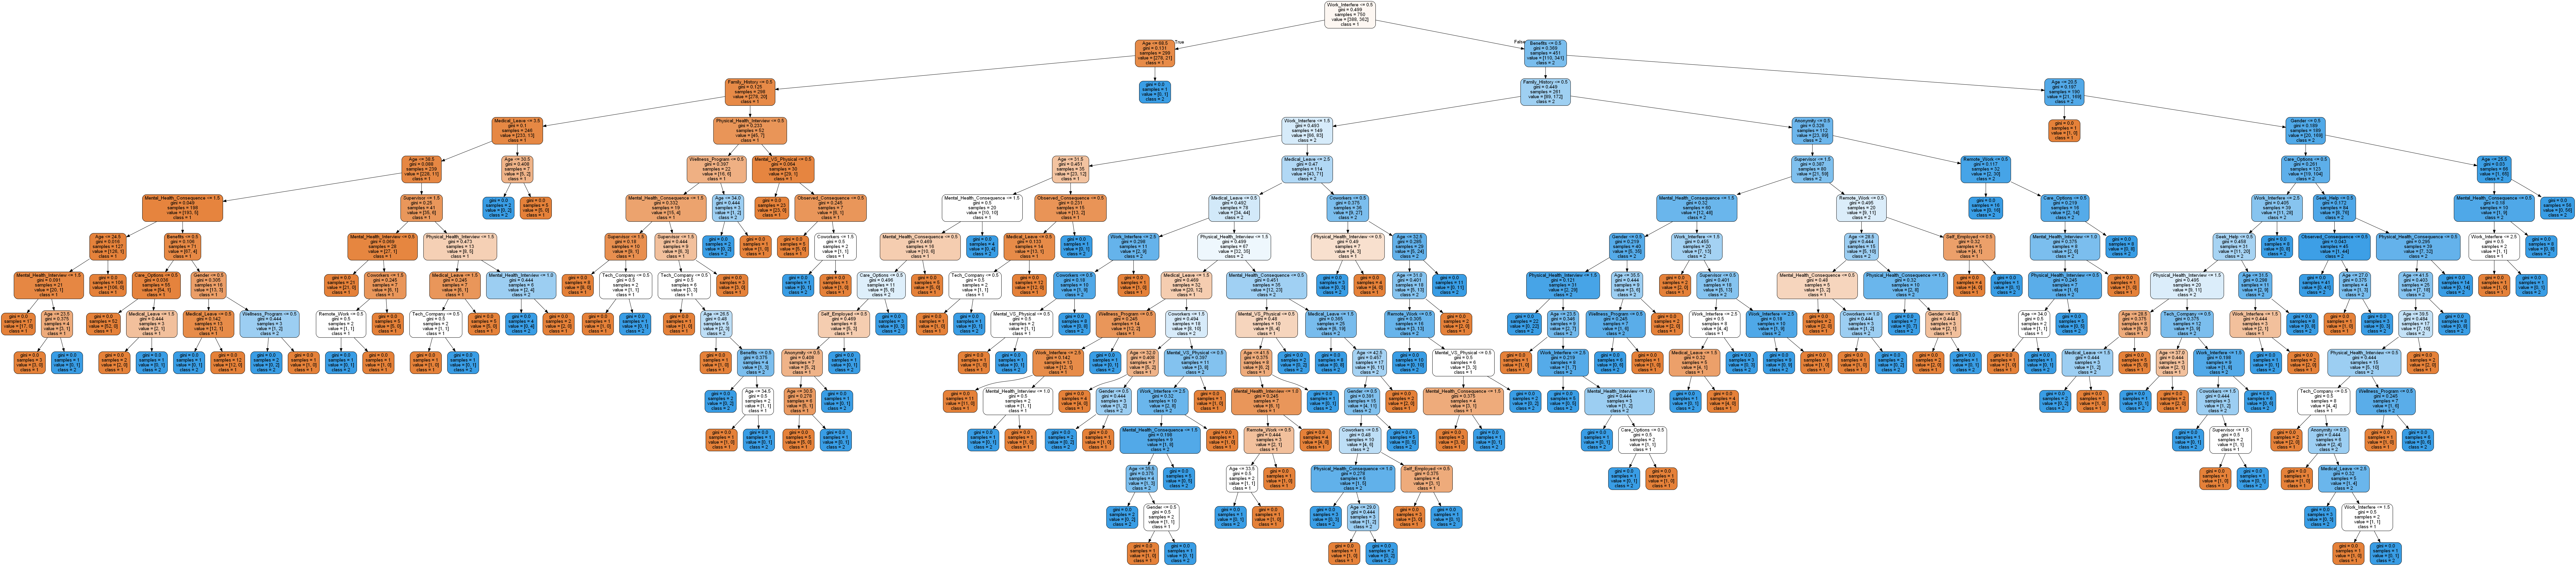

In [30]:
ddata=tree.export_graphviz(decision_tree,out_file=None,filled=True,rounded=True,
                          feature_names=col_names,
                          class_names=["1","2"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## Random Forest Model

In [37]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
s_max = 0
rf_train_score_list = []
rf_test_score_list = []

for i in range(1,X_train.shape[0]+1):
    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(X_train,y_train)
    test_score = rf.score(X_test,y_test)
    rf_test_score_list.append(test_score)
    train_score = rf.score(X_train,y_train)
    rf_train_score_list.append(train_score)
    if test_score >= s_max :
        s_max = test_score
        index = i

print("Best Score = ",s_max)
print("Best n_estimators = ",index)

Best Score =  0.8343313373253493
Best n_estimators =  746


In [38]:
rf = RandomForestClassifier(n_estimators = 60,random_state = 42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [39]:
y_pred_rf

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,

In [40]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
cr_rf = classification_report(y_test,y_pred_rf)
print("confusion matrix : \n",cm_rf)
print("classification report : \n",cr_rf)

confusion matrix : 
 [[178  53]
 [ 37 233]]
classification report : 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       231
           1       0.81      0.86      0.84       270

    accuracy                           0.82       501
   macro avg       0.82      0.82      0.82       501
weighted avg       0.82      0.82      0.82       501



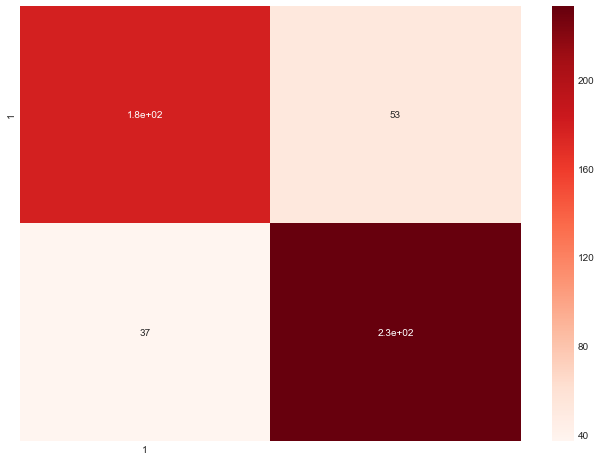

In [41]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_rf,annot = True,xticklabels = np.arange(1,2),yticklabels = np.arange(1,2),cmap = "Reds")
plt.show()

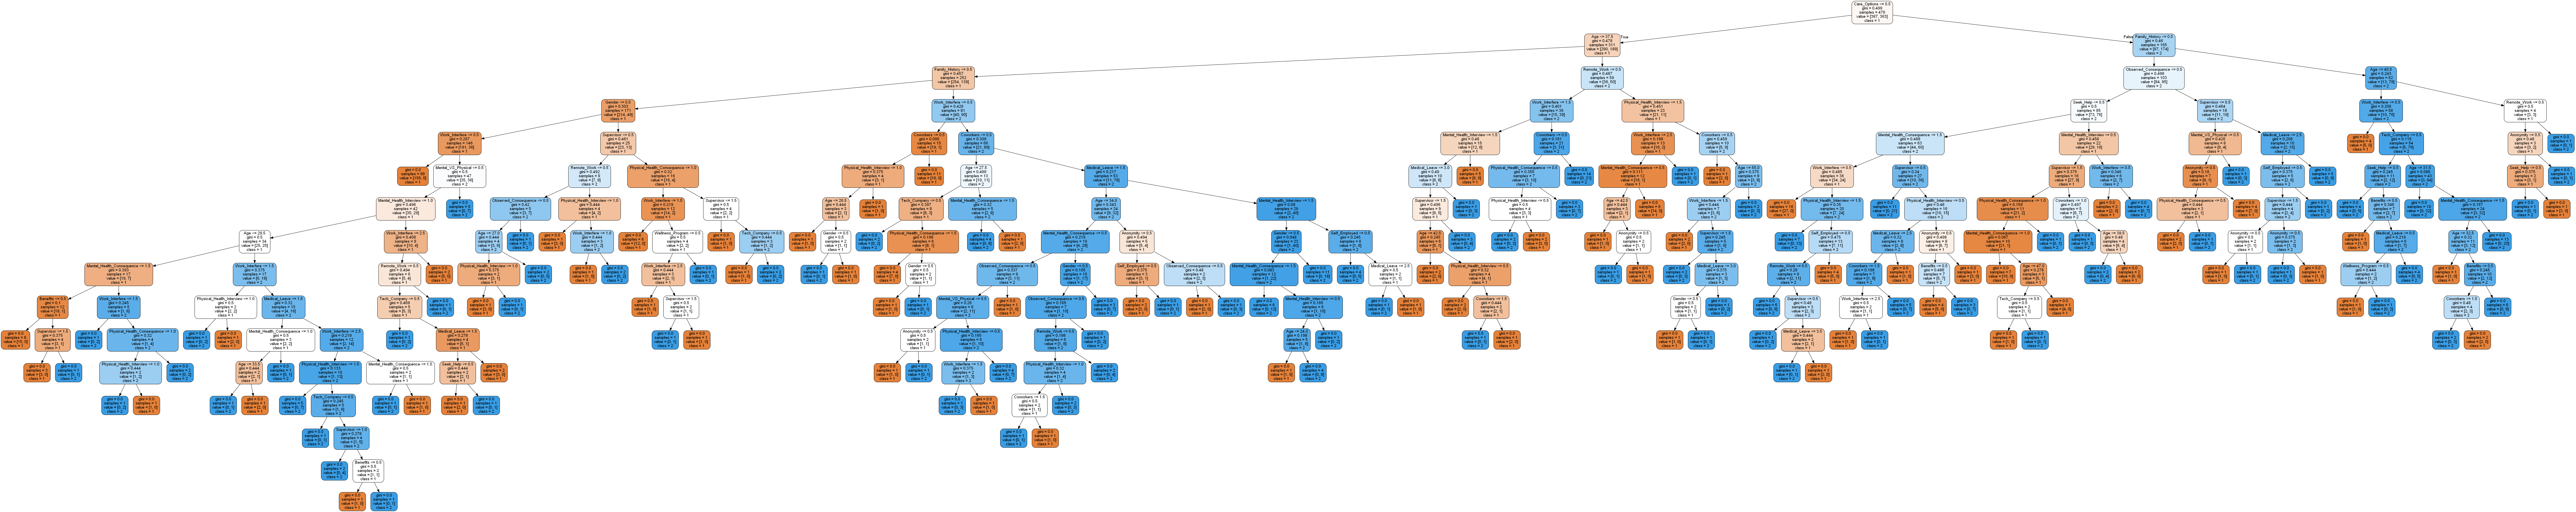

In [42]:
ddata=tree.export_graphviz(rf.estimators_[4],out_file=None,filled=True,rounded=True,
                          feature_names=col_names,
                          class_names=["1","2","3","4","5","6","7"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## SVM (Support Vector Machines)

In [43]:
from sklearn.svm import SVC

svm = SVC(random_state = 42,kernel = "linear")
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print("Train Accurary : ",svm.score(X_train,y_train))
print("Test Accuray : ",svm.score(X_test,y_test))

Train Accurary :  0.836
Test Accuray :  0.812375249500998


In [44]:
y_pred_svm

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [45]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
cr_svm = classification_report(y_test,y_pred_svm)
print("confusion matrix : \n",cm_svm)
print("classification report : \n",cr_svm)

confusion matrix : 
 [[173  58]
 [ 36 234]]
classification report : 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       231
           1       0.80      0.87      0.83       270

    accuracy                           0.81       501
   macro avg       0.81      0.81      0.81       501
weighted avg       0.81      0.81      0.81       501



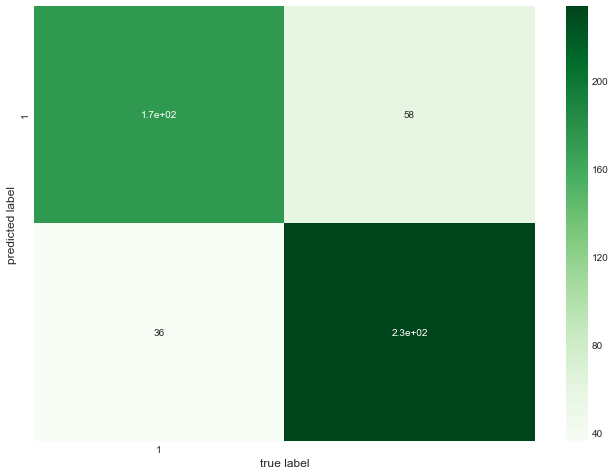

In [46]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_svm,annot = True,cmap = "Greens",xticklabels = np.arange(1,2),yticklabels = np.arange(1,2))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [61]:
# https://www.kaggle.com/osmi/mental-health-in-tech-survey